# 1. Dataset Building

In [ ]:
!pip install bing-image-downloader
!pip install huggingface_hub
!pip install datasets

import os
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
from bing_image_downloader import downloader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/content/drive/MyDrive/Dataset'
downloader.download(query="fruit", limit=100, adult_filter_off=True, output_dir=dir)

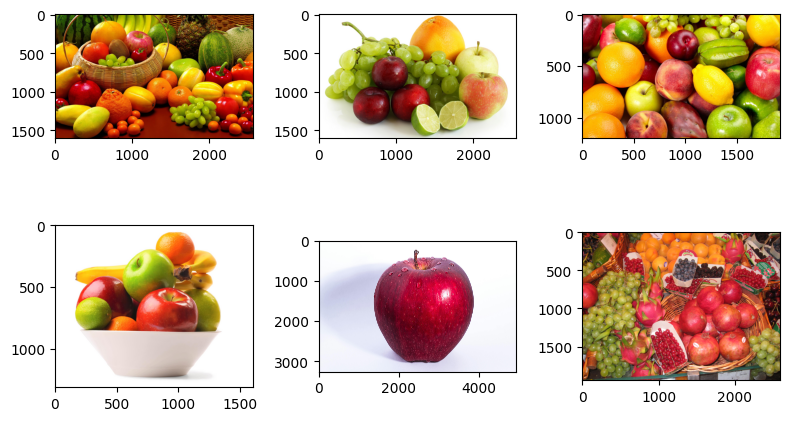

In [ ]:
data_dir = '/content/drive/MyDrive/Dataset/'
sub_dir = data_dir + 'fruit/'
fig = plt.figure(figsize=(8, 5))


image_list = glob.glob(sub_dir + '*')
rows, columns = 2, 3
for num in range(1, rows*columns+1):
    fig.add_subplot(rows, columns, num)
    idx = num - 1
    value = cv2.imread(image_list[idx])
    plt.imshow(cv2.cvtColor(value, cv2.COLOR_BGR2RGB))
fig.tight_layout()

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from datasets import load_dataset
dataset = load_dataset("imagefolder", data_dir="/content/drive/MyDrive/Dataset/fruit",drop_labels=True)
dataset.push_to_hub("Sunanda-Das/fruits-dataset")

Resolving data files:   0%|          | 0/100 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Sunanda-Das/fruits-dataset/commit/de3ed3303285cefee9a2c65a47baaa16c6d1ecc3', commit_message='Upload dataset', commit_description='', oid='de3ed3303285cefee9a2c65a47baaa16c6d1ecc3', pr_url=None, pr_revision=None, pr_num=None)

# 2. Finetune a Foundation Model

In [ ]:
!pip install diffusers
!pip install accelerate
!pip install git+https://github.com/huggingface/diffusers -q
!pip install accelerate -q
!pip install peft -q
!pip install datasets -q

from diffusers import StableDiffusionPipeline
import torch
from accelerate.utils import write_basic_config
write_basic_config()

In [ ]:
!nvidia-smi

Mon Jul 29 14:07:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
def display_images(images, title):
    plt.figure()
    f, axix = plt.subplots(1, len(images), figsize=(20,10))
    for ax, img in zip(axix.flatten(), images):
        ax.imshow(img)
        ax.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

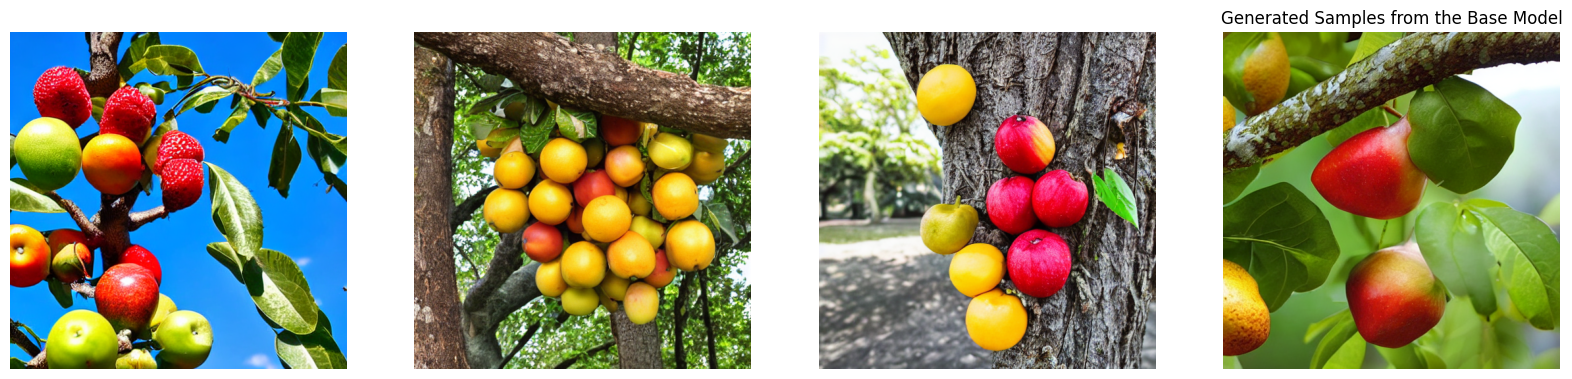

In [ ]:
prompt = "a photograph of fruits in a tree"
images = pipe(prompt, num_images_per_prompt=4).images
display_images(images, "Generated Samples from the Base Model")

In [ ]:
import requests
file_url = "https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora.py"
response = requests.get(file_url)
with open("train_dreambooth_lora.py", "w") as file:
    file.write(response.text)

In [ ]:
MODEL_NAME="runwayml/stable-diffusion-v1-5"
INSTANCE_DIR="/content/drive/MyDrive/Dataset/fruit"
OUTPUT_DIR="/content/"

!accelerate launch train_dreambooth_lora.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a photo of fruits" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --checkpointing_steps=100 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=500 \
  --validation_prompt="a photo of fruits" \
  --validation_epochs=50 \
  --seed="0"

In [ ]:
from diffusers import AutoPipelineForText2Image
pipeline2 = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline2.load_lora_weights("/content/", weight_name="pytorch_lora_weights.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

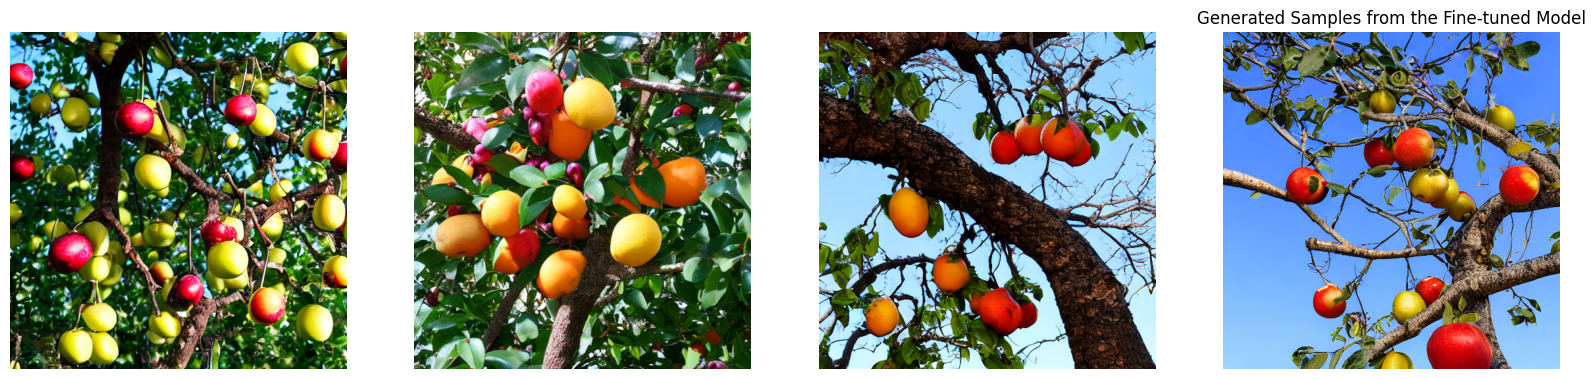

In [ ]:
prompt = "a photograph of fruits in a tree"
images_finetuned = pipeline2(prompt, num_images_per_prompt=4).images
display_images(images_finetuned, "Generated Samples from the Fine-tuned Model")